In [14]:
#!/usr/bin/env python
# coding: utf-8

# This script is used to compare ensemble outputs with NLDAS data
import os
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import xarray as xr
import datetime

#======================================================================================================
# main script
root_dir = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet'   
nldas_dir = os.path.join(root_dir,'data/nldas_daily_utc_convert_summary')
start_yr = 2012 #1979 #2013
end_yr = 2016 #2019 #2016

nldas_grid_file = os.path.join(root_dir,'data/nldas_topo/conus_ens_grid_eighth.nc')

result_dir = os.path.join(root_dir,'test_uniform_perturb')
test_folders = [d for d in os.listdir(result_dir)]
test_folders = sorted(test_folders)
scenarios_ids = range(0,9) #[0,1,5,8] 
intervals =  range(10,1,-1) #[10,9,5,2]
scenario_num = len(scenarios_ids)

subforlder = 'gmet_regr_summary'
file_basename = 'regress_ts_'
transfm_power = 1/4.0

ens_num = 100
time_format = '%Y-%m-%d'

dpi_value = 300 #150
plot_date_start = '2012-01-01' #'1979-01-01' #'2013-01-01'
plot_date_end = '2016-12-31' #'2019-12-31' #'2016-12-31'
plot_date_start_obj = datetime.datetime.strptime(plot_date_start, time_format)
plot_date_end_obj = datetime.datetime.strptime(plot_date_end, time_format)

output_dir=os.path.join(root_dir, 'scripts/step23_plot_regr_nldas_scatter')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
output_filename_base = 'step23_plot_regr_nldas_scatter_'
    
# #======================================================================================================
# print('Read gridinfo mask')
# # get xy mask from gridinfo.nc
# f_gridinfo = xr.open_dataset(nldas_grid_file)
# nldas_mask_xy = f_gridinfo['mask'].values[:] # (y, x). 1 is valid. 0 is invalid.
# mask_xy = (nldas_mask_xy!=0) 

# #======================================================================================================
# # read scenario ensemble results and save to dictionary
# print('Read regression result')
# for k in range(scenario_num):

#     test_folder = test_folders[scenarios_ids[k]]
    
#     print(test_folder)
#     test_dir = os.path.join(result_dir, test_folder)
#     fig_title= test_folder

#     print(' -- read spatial ensemble mean')
#     # read ensemble mean 
#     print('pcp')
#     output_basename = os.path.join(test_dir,subforlder,file_basename)
#     f=xr.open_dataset(os.path.join(output_basename+'pcp.nc'))
#     pcp_regr = f.variables['pcp'].values[:]
#     pcp_regr_transfm = (np.power(pcp_regr*transfm_power+1, 1/transfm_power))  #Cox-Box back-transform P  
#     time = f['time'].values[:]
#     time_regr = pd.DatetimeIndex(time)
        
#     print('tmean_2')
#     f=xr.open_dataset(os.path.join(output_basename+'tmean_2.nc'))
#     tmean_2_regr = f.variables['tmean_2'].values[:]

#     print('trange_2')
#     f=xr.open_dataset(os.path.join(output_basename+'trange_2.nc'))
#     trange_2_regr = f.variables['trange_2'].values[:]           

#     # define plot mask for nldas ensemble
#     mask_ens_t = (time_regr>=plot_date_start_obj) & (time_regr<=plot_date_end_obj)
    
#     print(' -- calculate temporal mean')
#     # caluclate time series mean(ny,nx)
#     pcp_regr = np.nanmean(pcp_regr_transfm[mask_ens_t,:,:],axis=0)     
#     tmean_2_regr = np.nanmean(tmean_2_regr[mask_ens_t,:,:],axis=0)
#     trange_2_regr = np.nanmean(trange_2_regr[mask_ens_t,:,:],axis=0)

#     print(' -- extract unmasked values')
#     # extract unmasked values
#     pcp_regr=pcp_regr[mask_xy]    
#     tmean_2_regr=tmean_2_regr[mask_xy] 
#     trange_2_regr=trange_2_regr[mask_xy] 
    
#     # save to array
#     if k == 0:
#         grid_num = len(pcp_regr)
#         pcp_regr_arr = np.zeros((grid_num,scenario_num+1)) #one more column for raw nldas
#         tmean_2_regr_arr = np.zeros((grid_num,scenario_num+1)) 
#         trange_2_regr_arr = np.zeros((grid_num,scenario_num+1)) 

#     pcp_regr_arr[:,k] = pcp_regr 
#     tmean_2_regr_arr[:,k] = tmean_2_regr  
#     trange_2_regr_arr[:,k] = trange_2_regr    

#     del time_regr, pcp_regr, tmean_2_regr, trange_2_regr, pcp_regr_transfm

# #======================================================================================================
# # read historical nldas data
# print('Read nldas data')
# print(' -- read spatial data')
# print('pcp')
# f_nldas = xr.open_dataset(os.path.join(nldas_dir, 'NLDAS_pcp.nc'))
# time = f_nldas['time'].values[:]
# pcp = f_nldas['pcp'].values[:] # (time, y, x). unit: mm/day

# print('t_mean')
# f_nldas = xr.open_dataset(os.path.join(nldas_dir, 'NLDAS_t_mean.nc'))                     
# t_mean = f_nldas['t_mean'].values[:] # (time, y, x). unit: degC

# # print('t_range')
# f_nldas = xr.open_dataset(os.path.join(nldas_dir, 'NLDAS_t_range.nc'))
# t_range = f_nldas['t_range'].values[:]

# # get time mask from nldas data
# time_obj = pd.to_datetime(time)
# mask_t  = (time_obj >= plot_date_start_obj) & (time_obj <= plot_date_end_obj) 
# time = time_obj[mask_t]

# print(' -- calculate temporal mean')
# prcp_mean = np.nanmean(pcp[mask_t,:,:], axis=0) #(y, x))
# tmean_mean = np.nanmean(t_mean[mask_t,:,:], axis=0) 
# trange_mean = np.nanmean(t_range[mask_t,:,:], axis=0)

# print(' -- extract unmasked values')
# # extract unmasked values
# prcp_mean=prcp_mean[mask_xy]
# tmean_mean=tmean_mean[mask_xy]
# trange_mean=trange_mean[mask_xy]

# # save to array
# pcp_regr_arr[:,-1] = prcp_mean 
# tmean_2_regr_arr[:,-1] = tmean_mean 
# trange_2_regr_arr[:,-1] = trange_mean 

# # del pcp,t_mean,t_range

# #======================================================================================================    
# # SAVE
# print('Save')
# var_list = ["Precp'", 'Tmean_2', 'Trange_2']
    
# # save mean value for re-use
# for i in range(len(var_list)):

#     if i == 0:
#         data=pcp_regr_arr
#     elif i == 1:
#         data=tmean_2_regr_arr
#     elif i == 2:
#         data=trange_2_regr_arr
        
#     output_filename_txt = var_list[i]+'_regr.txt'
#     np.savetxt(os.path.join(output_dir, output_filename_txt), data, delimiter=',',
#                fmt='%f',header='Col is sample scenario. Row is the time-series mean of regr in flatten valid grids. The last col is for raw NLDAS.')

#======================================================================================================    
# create a white-blue linear colormap
print('create colormap')

# reference: https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib
cmap = mpl.cm.get_cmap('jet') #‘viridis’，'jet' # get the blue color of jet 
c0 = cmap(0.0)
top = mpl.colors.LinearSegmentedColormap.from_list("", ["white",c0])

# combine two liner colormaps to create a
# reference: https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html
bottom = mpl.cm.get_cmap('jet') #'jet','viridis'
newcolors = np.vstack((top(np.linspace(0, 1, int(256*0.05))),bottom(np.linspace(0, 1, int(256*0.95)))))
# newcolors = np.vstack(bottom(np.linspace(0, 1, int(256))))
newcmp = mpl.colors.LinearSegmentedColormap.from_list("WhiteJet", newcolors)

#======================================================================================================    
# plot 
print('Plot')
var_list = ["Precp'", 'Tmean_2', 'Trange_2'] #"Precp_2'",
title_list = ["Precip", 'Tmean', 'DTR']

ylabel_list = ['$\^\mu_{Precip}$','$\^\mu_{Tmean}$','$\^\mu_{DTR}$']
var_units = ['(mm$\,$day$^{-1}$)','($^\circ$C)','($^\circ$C)']

for m in range(len(var_list)): # loop all variables
    var = var_list[m]
    output_filename = output_filename_base+var+'.png'
    print(var)
    
    # data load    
    output_filename_txt = var_list[m]+'_regr.txt'
    data = np.loadtxt(os.path.join(output_dir, output_filename_txt), delimiter=',', skiprows=1)
    
    # IMPORTANT: remove obviously incorrect P estimate (threshold P>20mm/day)
    # these incorrect P estimates come from transformation
    if m == 0:
        data=np.ma.masked_greater_equal(data, 20)
    
    mean = data[:,-1]
    ensmean_arr = data[:,0:-1] # time-series mean of estimated value
    
    # xy aixs range
    vmin_regr=np.nanmin([np.nanmin(ensmean_arr[:,k]) for k in range(scenario_num)])
    vmax_regr=np.nanmax([np.nanmax(ensmean_arr[:,k]) for k in range(scenario_num)])

#     vmin = np.nanmin([vmin_regr,np.nanmin(mean)])
#     vmax = np.nanmax([vmax_regr,np.nanmax(mean)])
    vmin = np.nanmin(mean) 
    vmax = np.nanmax(mean) 
    
    # MAE
    mae=[np.nanmean(np.absolute(ensmean_arr[:,k]-mean)) for k in range(scenario_num)]    
    
    # plot each varaiable seperately
    nrow = 3 # totally 9 sampling scenarios
    ncol = 3
            
    fig, ax = plt.subplots(nrow, ncol, figsize=(4.5,4.5)) #(4.5,4.5*1.0)
    
    for i in range(nrow):
        for j in range(ncol):
            k = i*ncol+j
            
#             print('sample scenario '+str(k+1))

            # 2D histograms
            # https://python-graph-gallery.com/83-basic-2d-histograms-with-matplotlib/
            x = mean
            y = ensmean_arr[:,k]
#             hist = ax[i,j].hist2d(x, y, bins=(200, 200),cmap=newcmp, 
#                                   range=[[vmin, vmax], [vmin, vmax]]) # return (counts, xedges, yedges, Image)
            hist = ax[i,j].hist2d(x, y, bins=(100, 100),cmap=newcmp, 
                                  range=[[vmin, vmax], [vmin, vmax]]) # return (counts, xedges, yedges, Image)
    
            # diagonal
            ax[i,j].plot([vmin, vmax],[vmin, vmax],color='grey',linewidth=0.5, alpha=0.6)
            
            # MAE text
            ax[i,j].annotate((r'$\overline{MAE}$=%.2f') %(mae[k]), xy=(0.05, 0.87), 
                             xycoords='axes fraction',fontsize='xx-small',fontstyle='italic')

#             # limit
            ax[i,j].set_xlim(vmin, vmax)
            ax[i,j].set_ylim(vmin, vmax)

            # label
            if i == nrow-1:
                xlabel = 'NLDAS-2 ' +title_list[m]+ ' ' + var_units[m]
                ax[i,j].set_xlabel(xlabel, fontsize='xx-small')
            if j == 0:
                ylabel = ylabel_list[m] +' '+ var_units[m]
                ax[i,j].set_ylabel(ylabel, fontsize='xx-small',labelpad=-0.1)
             
            # tick
            ax[i,j].tick_params(axis='both', direction='out',labelsize = 'xx-small', 
                                length=2, width=0.5, pad=0.5) 
            if j == 0:
                ax[i,j].tick_params(axis='both',labelleft = True)
            else:
                ax[i,j].tick_params(axis='both',labelleft = False)
            if i == nrow-1:
                ax[i,j].tick_params(axis='both',labelbottom = True)
            else:
                ax[i,j].tick_params(axis='both',labelbottom = False)
                
            # title
            title_str = 'Strategy '+str(k+1) +' (interval = '+str(intervals[k])+')'
            ax[i,j].set_title(title_str, fontsize='xx-small', fontweight='semibold',pad=2)

           # change subplot border width
            for axis in ['top','bottom','left','right']:
                ax[i,j].spines[axis].set_linewidth(0.5)
    
    # colorbar    
    fig.subplots_adjust(bottom=0.15, top=1, left = 0, right=1, wspace = 0.07, hspace = 0.2)
    cax = fig.add_axes([0.25, 0.05, 0.5, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(hist[3], cax=cax, orientation='horizontal')

    tick1 = hist[0].max()*0.5
    tick2 = hist[0].max()
    cbar.set_ticks([0, tick1, tick2]) 
    cbar.set_ticklabels(['Low', 'Medium', 'High'])  
    cbar.ax.tick_params(labelsize='xx-small', length=2, width=1)

    # set the colorbar ticks and tick labels
#     cbar.set_label(label='Number of grids per pixel',size='xx-small')    
    cbar.set_label(label='Number of grids',size='xx-small')    

    # save plot
    fig.savefig(os.path.join(output_dir, output_filename), dpi=dpi_value, 
                bbox_inches = 'tight', pad_inches = 0.05)
    plt.close(fig)

print('Done')



create colormap
Plot
Precp'
Tmean_2
Trange_2
Done


In [42]:
# This script is used to compare ensemble outputs with NLDAS data
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import datetime

# main script
root_dir = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet'   
nldas_dir = os.path.join(root_dir,'data/nldas_daily_utc_convert_summary')
nldas_grid_file = os.path.join(root_dir,'data/nldas_topo/conus_ens_grid_eighth.nc')

f_nldas = xr.open_dataset(os.path.join(nldas_dir, 'NLDAS_1979_2019_t_range.nc')) #'NLDAS_t_mean.nc'
time = f_nldas['time'].values[:]
t_range = f_nldas['t_range'].values[:] # (time, y, x). unit: degC

# mask_ref = np.isnan(t_mean[0,:,:])
for i in range(1,t_mean.shape[0]):
    mask_before = np.isnan(t_range[i-1,:,:])
    mask = np.isnan(t_range[i,:,:])
    
    a=np.where(mask != mask_before)
    if len(a[0])!=0:
        print(time[i])
        
print('Done')

Done


In [43]:
ii=0
print(time[ii])
mask_79_14 = np.isnan(t_mean[ii,:,:])

jj=13150
print(time[jj])
mask_15_16 = np.isnan(t_mean[jj,:,:])

kk=13881
print(time[kk])
mask_17_19 = np.isnan(t_mean[kk,:,:])

1979-01-01T00:00:00.000000000
2015-01-02T00:00:00.000000000
2017-01-02T00:00:00.000000000


In [44]:
np.where(mask_79_14!=mask_17_19)

(array([], dtype=int64), array([], dtype=int64))

In [45]:
np.where(mask_79_14!=mask_15_16)

(array([], dtype=int64), array([], dtype=int64))

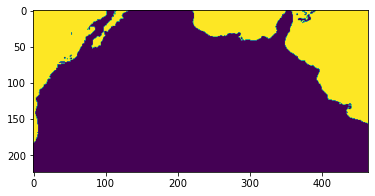

In [33]:
plt.imshow(mask_79_14!=mask_15_16)

In [34]:
mask_15_16

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [35]:
mask_79_14

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [36]:
t_mean[jj,:,:]

array([[ 1.00000000e+20,  1.00000000e+20,  1.00000000e+20, ...,
         1.00000000e+20,  1.00000000e+20,  1.00000000e+20],
       [ 1.00000000e+20,  1.00000000e+20,  1.00000000e+20, ...,
         1.00000000e+20,  1.00000000e+20,  1.00000000e+20],
       [ 1.00000000e+20,  1.00000000e+20,  1.00000000e+20, ...,
         1.00000000e+20,  1.00000000e+20,  1.00000000e+20],
       ...,
       [-4.35623779e+00, -4.68707886e+00, -2.90125122e+00, ...,
        -1.94870819e+01, -1.94645905e+01, -1.92654175e+01],
       [-3.00958862e+00, -3.34125366e+00, -2.99124756e+00, ...,
        -1.99779114e+01, -1.99087433e+01, -1.94016632e+01],
       [-5.39587402e-01, -1.08292236e+00, -1.88501587e+00, ...,
        -1.97962555e+01, -1.95775055e+01, -1.95720886e+01]])